In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [57]:
folder   = "Model_Data/"
scen_list = ['Mixed', 'Fixed_PVs', 'Fixed_EVs']
algo_list= ['AHE', 'Diag', 'FP', 'SFP']
DAs_Names = ['Model_Data_DA_1_', 'Model_Data_DA_2_', 'Model_Data_DA_3_']

df_all =[]

time = [16+x for x in range(24)]

for sen in sen_list:
    for algo in algo_list: 
        for da in DAs_Names:
            df = pd.read_csv(folder+sen+"/"+da+algo+"_"+sen+".csv")
            time_list = time*len(df.Iteration.unique())
            df['Time'] = time_list
            df_all.append(df)

In [50]:
df

,Iteration,DAs_load\r\nE_DAs_L,DAs_generation\r\nE_DAs_G,DAs_demand_bid\r\nb_t,DAs_supply_offer\r\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,Bus4_price,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6,Time
0,0,0.028383,0.000000,0.028383,0.000000,4000.000000,0.0,0.0,3930.12,34424.58400,...,15.0,15.0,15.0,0.0,-0.005876,-0.007112,-0.006100,-0.006844,-0.007714,16
1,0,0.227747,0.000000,0.227747,0.000000,16689.361702,0.0,0.0,4916.04,59570.60536,...,15.0,15.0,15.0,0.0,-0.025772,-0.032001,-0.022475,-0.025193,-0.035031,17
2,0,0.438744,0.000000,0.438744,0.000000,19208.510638,0.0,0.0,52359.16,75885.36976,...,15.0,15.0,15.0,0.0,-0.060849,-0.073978,-0.061458,-0.068158,-0.080365,18
3,0,0.526908,-0.000000,0.526908,0.000000,28417.021277,0.0,0.0,37873.08,86234.69520,...,15.0,15.0,15.0,0.0,-0.063498,-0.078615,-0.056593,-0.063920,-0.085969,19
4,0,0.578610,0.000000,0.578610,0.000000,34070.653970,0.0,0.0,51770.88,83700.99492,...,15.0,15.0,15.0,0.0,-0.066807,-0.082694,-0.059641,-0.066755,-0.090422,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,218,0.002978,0.000000,0.002978,0.000000,0.000000,0.0,0.0,70113.08,33473.99772,...,13.0,13.0,13.0,0.0,-0.001281,-0.002165,0.001944,0.000320,-0.002595,35
5252,218,0.000000,0.021676,0.000000,0.021676,0.000000,0.0,0.0,33632.40,32772.96192,...,14.0,14.0,14.0,0.0,-0.000701,-0.001185,0.001063,0.000332,-0.001420,36
5253,218,0.301312,0.000000,0.301312,0.000000,0.000000,0.0,0.0,219950.52,34342.06868,...,14.0,14.0,14.0,0.0,-0.007412,-0.012529,0.011248,0.005031,-0.015019,37
5254,218,0.000000,0.086715,0.000000,0.086715,0.000000,0.0,0.0,0.00,33135.15792,...,15.0,15.0,15.0,0.0,0.001249,0.005499,-0.019931,-0.018567,0.007566,38


In [51]:
text_list =[]
for sen in sen_list:
    for algo in algo_list: 
        for da in DAs_Names:
            txt = da+"_"+algo+"_"+sen
            text_list.append(txt)

In [65]:
len(text_list)*4

144

# Check for Generation for each genarator based on Algorithm and Category

<AxesSubplot:xlabel='Scenario', ylabel='Generation'>

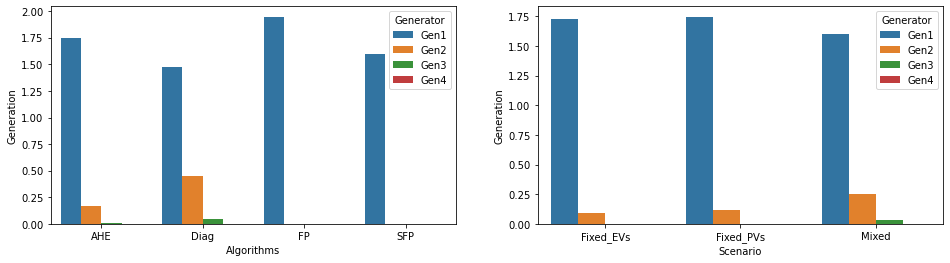

In [74]:
count_algo = 0
count_scen = 0
counter = 0
last_n_iter = 50
no_iterations = 0
gen_list = ['Gen1', 'Gen2', 'Gen3', 'Gen4']
time_list = ['Iteration','Time']
categories = ['cat_01','cat_02', 'cat_03']
            
    
gen_value=[]
gen_col=[]
algo_col=[]
scen_col=[]
cat_col =[]

# Retrive Data
for df in df_all:
    no_iteration = len(df.Iteration.unique())
    if no_iterations > last_n_iter:
        df = df[df['Iteration'] > no_iterations - last_n_iter]
    df = df[[*gen_list, *time_list]]
    df = df[[*gen_list, *time_list]].mean().tolist()[:4]
    count4=0
    for v in df:
        gen_value.append(v);
        gen_col.append(gen_list[count4])
        algo_col.append(algo_list[count_algo])
        scen_col.append(scen_list[count_scen])
        cat_col.append(categories[counter%3])
        count4+=1
    counter+=1
    if counter%3==0:
        count_algo+=1
    if count_algo > 3:
        count_algo=0
    if counter%12==0:
        count_scen+=1

df_compare = pd.DataFrame({'Generator':gen_col, 'Algorithms':algo_col, 'Scenario':scen_col, 'Categories':cat_col, 'Generation':gen_value})

# Plot data
fig, axes = plt.subplots(1, 2, figsize=(16, 4))


sns.barplot(data= df_compare.groupby(['Generator','Algorithms']).mean().reset_index(),
            x='Algorithms', y='Generation', hue='Generator', hue_order=gen_list , ax=axes[0])

sns.barplot(data= df_compare.groupby(['Generator','Scenario']).mean().reset_index(),
            x='Scenario', y='Generation', hue='Generator', hue_order=gen_list , ax=axes[1])


In [72]:
df_compare.groupby(['Generator','Scenario']).mean().reset_index()

,Generator,Scenario,Generation
0,Gen1,Fixed_EVs,1.727844
1,Gen1,Fixed_PVs,1.747373
2,Gen1,Mixed,1.598644
3,Gen2,Fixed_EVs,0.094896
4,Gen2,Fixed_PVs,0.114715
5,Gen2,Mixed,0.256405
6,Gen3,Fixed_EVs,0.002393
7,Gen3,Fixed_PVs,0.002494
8,Gen3,Mixed,0.033148
9,Gen4,Fixed_EVs,0.000000


144